# Decision Tree Exercise with Breast Cancer Dataset

In [4]:
from pandas import read_csv, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
from subprocess import call
import pydotplus
from sklearn.preprocessing import LabelEncoder

## Step 1 - Load data

In [5]:
raw_data = read_csv('breast-cancer-wisconsin.csv')
raw_data.head()

,row,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,se_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,cancer_type
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
class_labels = raw_data['cancer_type'].unique()
class_labels

array([2, 4])

In [7]:
feature_columns = raw_data.drop('cancer_type', axis=1).columns
label_columns = ['cancer_type']
print('feature columns:' + str(feature_columns) + '\n')
print(' label columns:' + str(label_columns))

feature columns:Index([u'row', u'clump_thickness', u'uniform_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'se_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses'],
      dtype='object')

 label columns:['cancer_type']


## Step 2 - Split data in train and test

In [8]:
x = raw_data.filter(feature_columns).apply(LabelEncoder().fit_transform).as_matrix()
y = raw_data.filter(label_columns).as_matrix()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, random_state = 100)

## Step 3 - Train decision tree

In [9]:
cancer_decision_tree = DecisionTreeClassifier().fit(x_train, y_train)

## Step 4 - Test decision tree

In [10]:
y_pred = cancer_decision_tree.predict(x_test)
'Decision tree accuracy is ' + str(accuracy_score(y_test, y_pred))

'Decision tree accuracy is 0.909523809524'

## Step 5 - Plot the decision tree

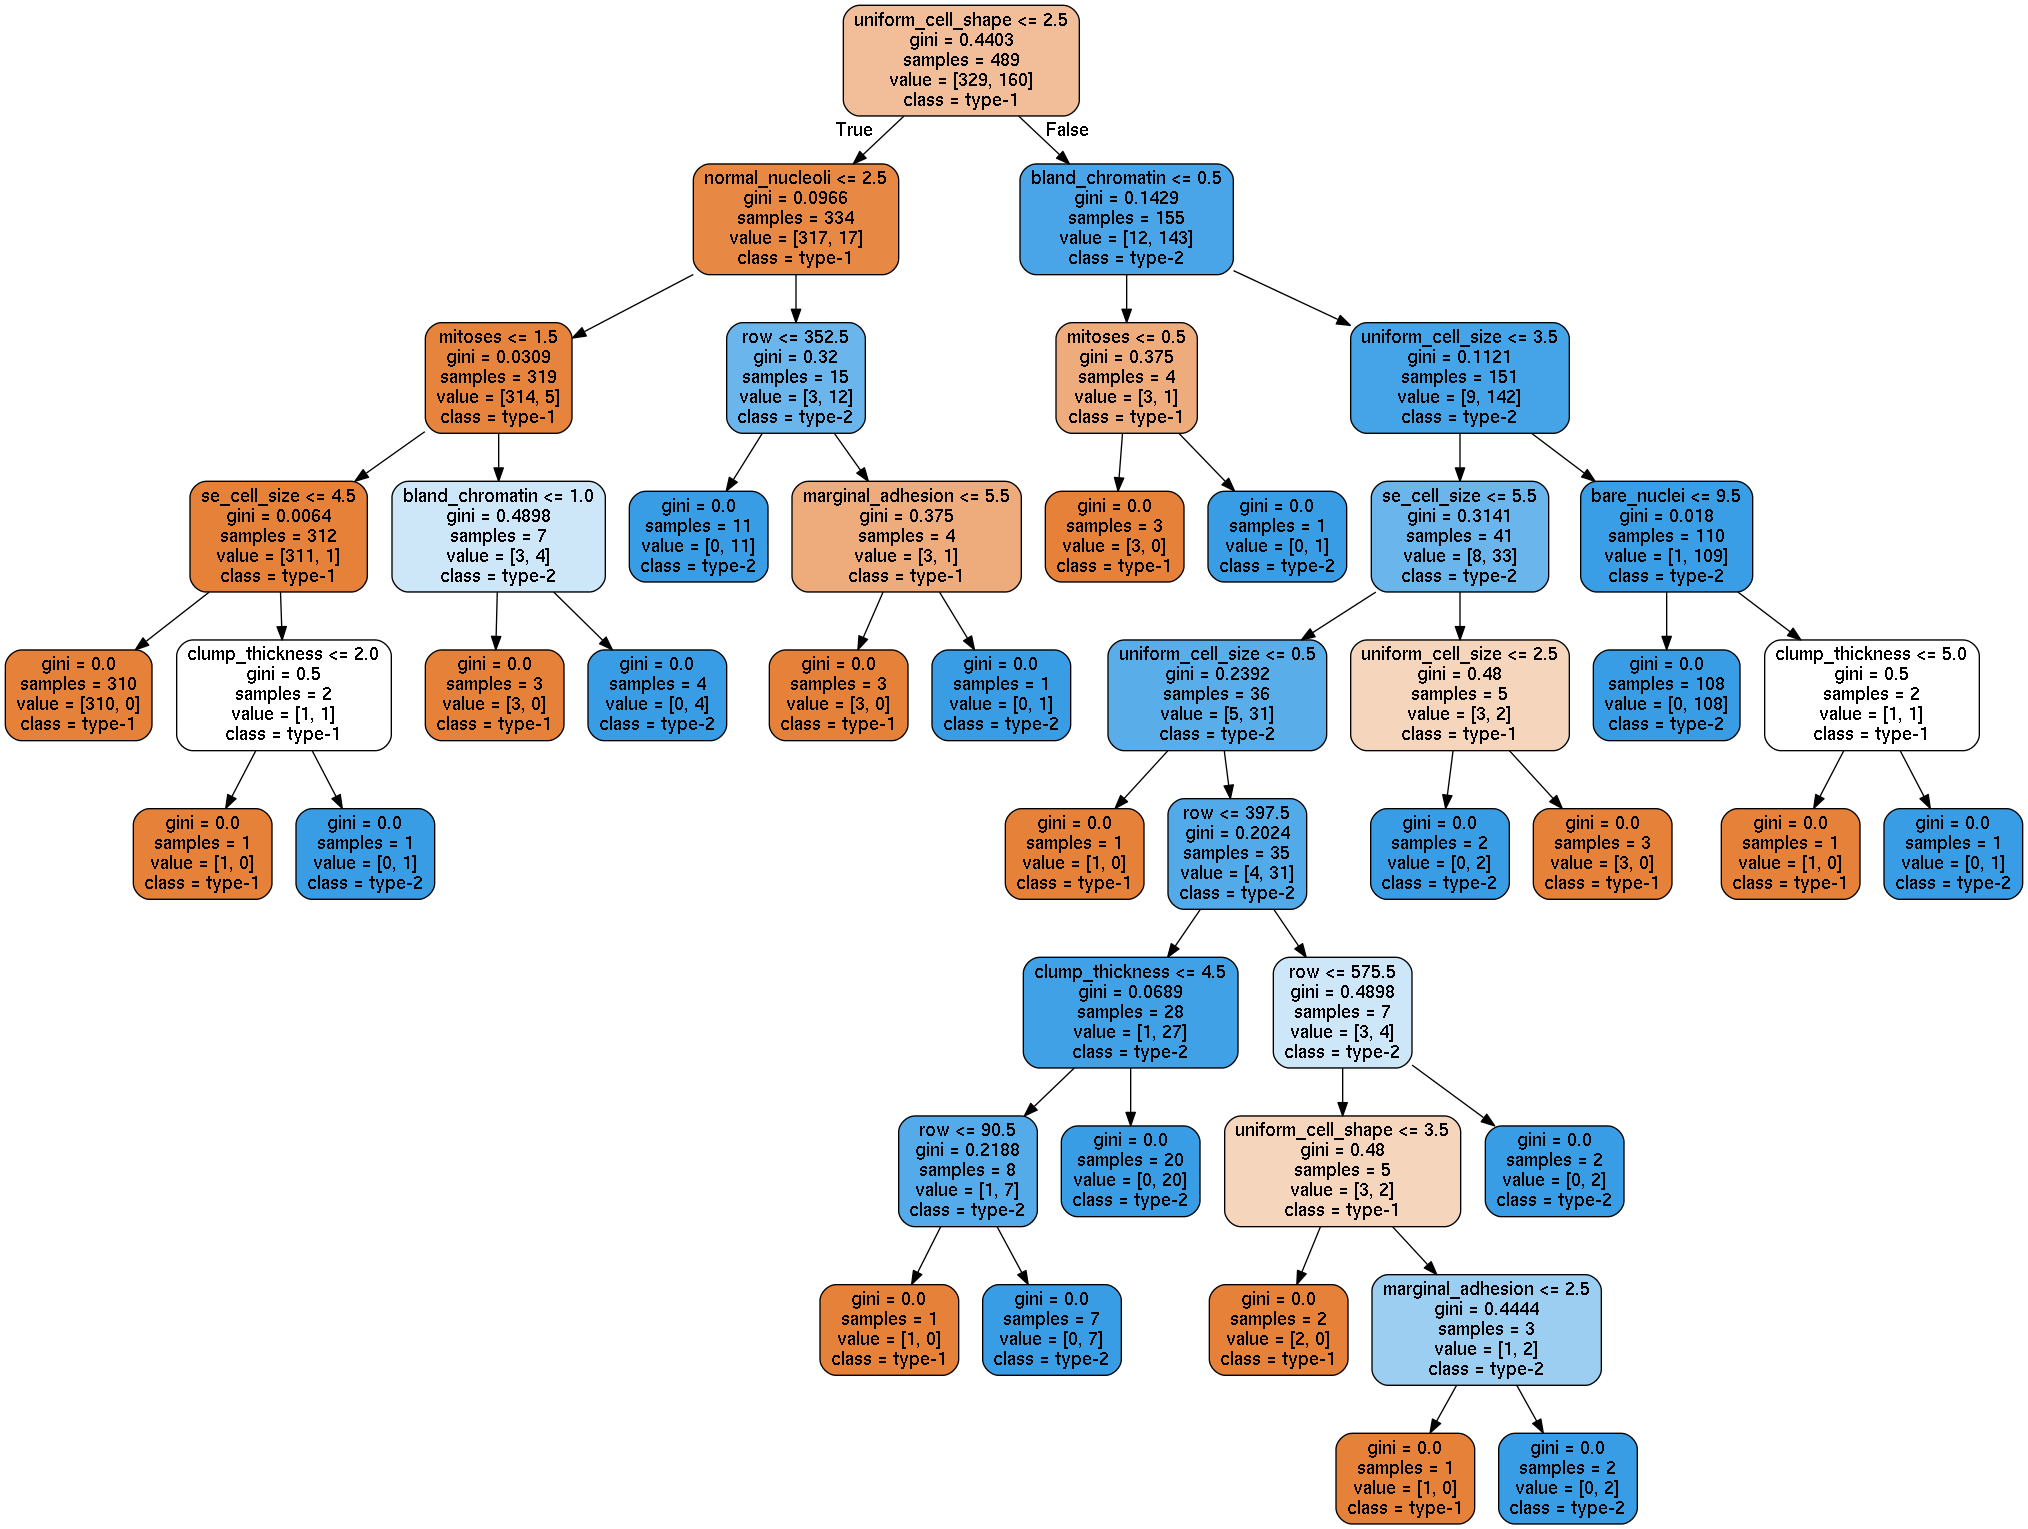

In [11]:
dot_data = export_graphviz(cancer_decision_tree, 
                    out_file=None,
                    feature_names=feature_columns,
                    class_names=['type-1','type-2','type-3'],  # [1, 2, 3]
                    filled=True, 
                    rounded=True,
                    special_characters = False)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## Attributes importance

In [12]:
attr_importance = DataFrame()
attr_importance['feature']    = feature_columns
attr_importance['importance'] = cancer_decision_tree.feature_importances_
attr_importance.sort_values('importance', ascending=False)

,feature,importance
3,uniform_cell_shape,0.752227
8,normal_nucleoli,0.081869
0,row,0.036262
7,bland_chromatin,0.033179
2,uniform_cell_size,0.027835
9,mitoses,0.027502
5,se_cell_size,0.013286
4,marginal_adhesion,0.013160
1,clump_thickness,0.010119
6,bare_nuclei,0.004560


## Simplified decision tree

In [14]:
simplified_decision_tree = DecisionTreeClassifier(max_depth=2, min_samples_split=5).fit(x_train, y_train)
y_pred_2 = simplified_decision_tree.predict(x_test)
'Simplified decision tree accuracy is ' + str(accuracy_score(y_test, y_pred_2))

'Simplified decision tree accuracy is 0.9'

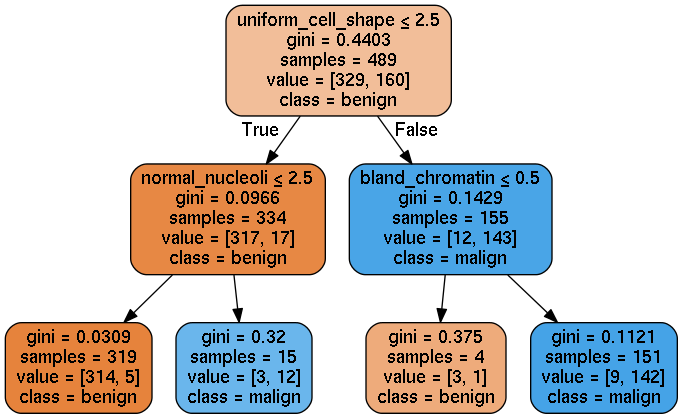

In [17]:
dot_data = export_graphviz(simplified_decision_tree, out_file=None, 
                    feature_names=feature_columns,  
                    class_names=['benign', 'malign'],  
                    filled=True, rounded=True,  
                    special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())